# Basic Operations

Learn the basic state and gates of photonqat's Fockbase.

Gaussian base can do the same, except that some Fockbase features are not available. Since the processing in backend is different, it is faster and more accurate than Fockbase instead.

In [1]:
from blueqat import photonqat as pq
import numpy as np

$$\def\bra#1{\mathinner{\left\langle{#1}\right|}} \def\ket#1{\mathinner{\left|{#1}\right\rangle}}\def\braket#1#2{\mathinner{\left\langle{#1}\middle|#2\right\rangle}}$$
### Photon number state (Fock state)

$\ket{\psi} = \alpha_0 \ket{0} + \alpha_1 \ket{1} + \alpha_2 \ket{2} + ...$

$\braket{n}{m} = \delta_{nm}$  
$\sum_{k}|\alpha_{k}|^2 = 1$

```n_photon(mode, photonNum)``` Any state can be prepared with this method.

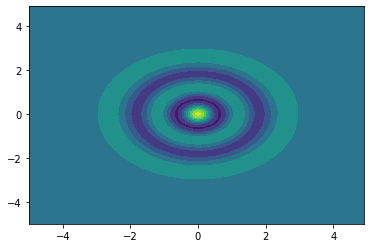

Photon number state:
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [2]:
F = pq.Fock(1, cutoff = 15) # (qumode, cutoff dim)
F.n_photon(0, 4) # (qumode, photon number state)

F.run()

(x, p, W) = F.Wigner(0, plot = 'y', xrange = 5.0, prange = 5.0) # plot Wigner function

print("Photon number state:\n", F.state)

### Wigner function

In addition to expressing the quantum state of light as a photon number state, it can be plotted as a function on the phase plane using the Wigner function.

```F.Wigner(mode, plot = 'y' or 'n', xrange = 5.0, prange = 5.0)```

Photon number state is notation of density operator $\rho = \sum_{n, n'}C_{n n'}\ket{n}\bra{n'}$.

$\rho = \ket{n'}\bra{n}$ Against
- $n \leq n'$ in case of
$W_{nn'}(q, p) = \frac{2(-1)^n}{\pi} \sqrt{\frac{2^{n'} n!}{2^{n} n'!}} (q-ip)^{n'-n}e^{-(q^2+p^2)}L_{n}^{n'-n}(2(q^2+p^2))$  
- $n' \leq n$ in case of
$W_{nn'}(q, p) = \frac{2(-1)^{n'}}{\pi} \sqrt{\frac{2^{n} n'!}{2^{n'} n!}} (q+ip)^{n-n'}e^{-(q^2+p^2)}L_{n'}^{n-n'}(2(q^2+p^2))$  

Is calculated and plotted for each.
The function plotted here represents the probability of measuring the quantum state by position or momentum.

### Desplacement gate

$D(\alpha) = \exp(\alpha \hat{a}^{\dagger} - \alpha^{*}a^{\dagger})$

$(q, p)$ state translated on the phase plane is $(Re(\alpha), Im(\alpha))$.

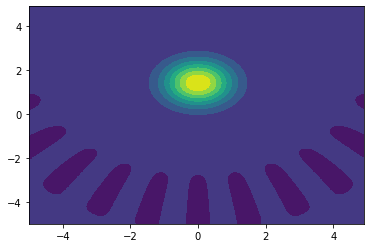

In [3]:
alpha = (0 + 1j) # parameter

F = pq.Fock(1, cutoff = 15)
F.D(0, alpha) # Dgate

F.run()

(x, p, W) = F.Wigner(0, plot = 'y', xrange = 5.0, prange = 5.0) # plot Wigner function

### Squeezing gate 

$S(\epsilon) = \exp{(\frac{1}{2}\epsilon^{*}\hat{a}^{2}} - \frac{1}{2}\epsilon\hat{a}^{\dagger 2})$  
$\epsilon = re^{2i\phi}$

Normal ordered form  

$S(r, \phi) = (\cosh{r})^{-1/2} \exp(-\frac{\Gamma}{2}\hat{a}^{\dagger 2}) \exp(-\ln(\cosh{r})\hat{a}^{\dagger}\hat{a}) \exp(\frac{\Gamma^{*}}{2}\hat{a}^{2})$

Squeezing operator increases the uncertainity in one phase quadrature while reducing it for the other.

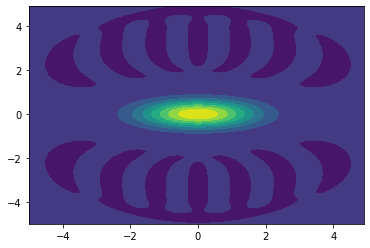

In [4]:
r = .5
phi = np.pi/2
eps = r * np.exp(2j * phi)

F = pq.Fock(1, cutoff = 15)
F.S(0, eps) # Sgate

F.run()

(x, p, W) = F.Wigner(0, plot = 'y', xrange = 5.0, prange = 5.0) # plot Wigner function

### Beam splitter

Beam splitter hamiltonian: $\hat{H} = i\hbar \theta (\hat{a}_{1}^{\dagger}\hat{a}_{2} -\hat{a}_{1}  \hat{a}_{2}^{\dagger})$

$BSgate = \exp(\frac{i}{\hbar}\hat{H})$

A beam splitter mixes the light from the two different inputs.  
A beam splitter is device that reflects $R$% of incoming light transmits $T$% ( where $R + T=100$) and is like a mirror that transmits a certain amount of light.

In [5]:
mode = 0
F = pq.Fock(2, cutoff = 20)
F.n_photon(0, 1)
F.n_photon(1, 1)
F.BS(0, 1, -np.pi/4) # 50:50 Beam splitter
F.run()
res = F.photonSampling(0, ite = 50) # mode 0, experiment repeated 50 times
print(res)
print("HOM interferometer: When two Single photon Modes are input to the beam splitter, the number of photons in the output mode is always 2 in one mode and 0 in the other.")

[2 2 2 0 0 0 0 0 2 2 2 0 2 0 2 2 0 0 0 2 0 0 0 2 2 2 0 0 2 2 2 2 0 0 0 0 0
 2 0 0 0 2 2 0 0 0 2 0 2 0]
HOM interferometer: When two Single photon Modes are input to the beam splitter, the number of photons in the output mode is always 2 in one mode and 0 in the other.


### Kerr gate 

Kerr hamiltoninan:  $H = \hbar \frac{\chi}{2} (\hat{a}^{\dagger})^2 \hat{a}^2$

$K = \exp{(\frac{i}{\hbar}H)} = \exp{(i\frac{\chi}{2} (\hat{a}^{\dagger})^2 \hat{a}^2)} = \exp{(i\frac{\chi}{2} \hat{a}^{\dagger} \hat{n} \hat{a})}$

In some light media, the refractive index depends on the intensity of light, and this phenomenon is called the Kerr effect.
On the phase plane, the phase rotates at different angles depending on the distance (= intensity) from the center.

Kerr gate is a kind of what is called a non-linear gate.
It is said that at least one kind of nonlinear gate is required to perform universal calculation in continuous quantity photon calculation.

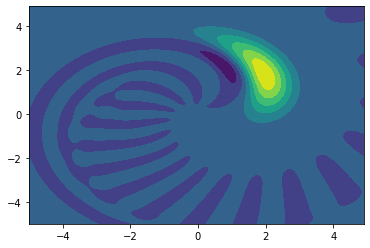

In [6]:
alpha = 2
chi = .2

F = pq.Fock(1, cutoff = 20)
F.D(0, alpha)
F.Kerr(0, chi)
F.run()

x, p, W = F.Wigner(0, method = 'clenshaw') # plot